In [1]:
using DifferentialEquations
using Plots

# Simple Harmonic Oscillator

The differential equation for a simple harmonic oscillator is given by 
\begin{equation}
    \ddot{x} + \omega_0^2x = 0 
\end{equation}
where $k=K/m$ is the reduced spring constant. 

In [11]:
force(dx, x, k, t) = -k*x
dx₀ = 1.0 
x₀ = 0.0 
k = 10.0
tspan = (0.0, 10.0)

prob = SecondOrderODEProblem(force, dx₀, x₀, tspan, k)

ODEProblem with uType ArrayPartition{Float64, Tuple{Float64, Float64}} and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: (1.0, 0.0)

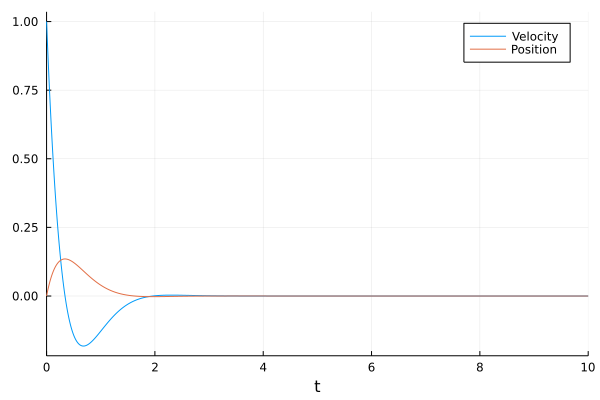

In [15]:
sol = solve(prob); 
plot(sol, label=["Velocity" "Position"])

# Damped Harmonic Oscillator

We can introduce friction into the system via a new term. This leads us to the form: 
\begin{equation}
    \ddot{x} + \frac{\gamma}{2}\dot{x} + \omega_0^2x = 0 
\end{equation}
Friction works *against* the spring force... hence the positive coefficient $\gamma$. 

In [20]:
damped_force(dx, x, p, t) = -p[1]*x - p[2]*dx
dx₀ = 1.0 
x₀ = 0.0 
tspan = (0.0, 10.0)

p = [9.0, 1.0]
prob = SecondOrderODEProblem(damped_force, dx₀, x₀, tspan, p)

ODEProblem with uType ArrayPartition{Float64, Tuple{Float64, Float64}} and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: (1.0, 0.0)

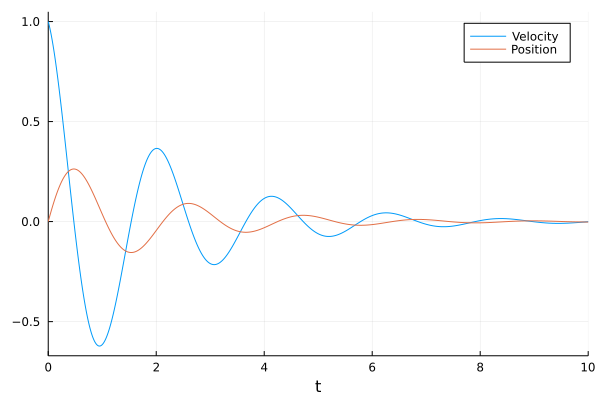

In [21]:
sol = solve(prob);
plot(sol, label=["Velocity" "Position"])

there are 3 regimes of parameter values to consider: 
- Under damped: $\left(\dfrac{\gamma}{2}\right)^2 < \omega_0^2$
- Critically damped: $\left(\dfrac{\gamma}{2}\right)^2 = \omega_0^2$
- Over damped: $\left(\dfrac{\gamma}{2}\right)^2 > \omega_0^2$

In [24]:
using Interact # for widgets

WebIO._IJuliaInit()

In [31]:
@manipulate for i ∈ 0.1:0.1:15
    p = [3.0, i]
    prob = SecondOrderODEProblem(damped_force, dx₀, x₀, tspan, p)
    sol = solve(prob);
    plot(sol, label=["Velocity" "Position"])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 150, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
75, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/john/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/john/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/john/.julia/packages/InteractBase/o1I6G/src/../assets/all.js"), Asset("css", nothing, "/home/john/.julia/packages/InteractBase/o1I6G/src/../assets/style.css"), Asset("css", nothing, "/home/john/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f57984431f0, Task (runnable) @0x00007f57984431f0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\",\"1.1\",\"1.2\",\"1.3\",\"1.4\",\"1.5\",\"1.6\",\"1.7\",\"1.8\",\"1.9\",\"2.0\",\"2.1\",\"2.2\",\"2.3\",\"2.4\",\"2.5\",\"2.6\",\"2.7\",\"2.8\",\"2.9\",\"3.0\",\"3.1\",\"3.2\",\"3.3\",\"3.4\",\"3.5\",\"3.6\